In [1]:
'''Udacity Course; ML for Finance''' ###import util you dumby
import os
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib import style
from datetime import date


In [2]:
"""6.5, 6.6, 6.13 How to plot a histogram"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    ##########################################################
    pass  # TODO: Your code here (DO NOT modify anything else)
    ##########################################################


def symbol_to_path(symbol):
    """Return CSV file path given ticker symbol."""
    return os.path.join("{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy() # copy given DataFrame to match size and column names
    daily_returns[1:] = (df/df.shift(1)) - 1 #values divided by the following day, ty pandas!
    daily_returns.iloc[0, :] = 0 #Pandas leaves the 0th row full of NaNs
    return daily_returns

def test_run():
    """Function called by Test Run."""
    # Read data
    symbol_list = ["SPY"]  # list of symbols
    start_date = "2018-05-18"
    end_date = "2019-05-17"
    dates = pd.date_range(start_date, end_date)  # date range as index
    df = get_data(symbol_list, dates)  # get data for each symbol

    #Compute Daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title='Daily returns', ylabel='Daily returns')
    
    #Plot a histogram
    daily_returns.hist(bins=20) #changing no. of bins to 20
    
    
    #6.6 get mean and standard deviation
    mean = daily_returns['SPY'].mean()
    print ("mean=", mean)
    std = daily_returns['SPY'].std()
    print ("std=", std)
    
    #Plot the stats
    plt.axvline(mean,color='lightgrey', linestyle='dashed', linewidth=2)
    plt.axvline(std,color='grey', linestyle='dashed', linewidth=2)
    plt.axvline(-std,color='grey', linestyle='dashed', linewidth=2)
    plt.show() 
    
if __name__ == "__main__":
    test_run()


UnboundLocalError: local variable 'df_final' referenced before assignment

INNT_beta: 0.2611054036568798
INNT_alpha: 0.002926770649735673
OTLK_beta: 0.2611054036568798
OTLK_alpha: 0.002926770649735673


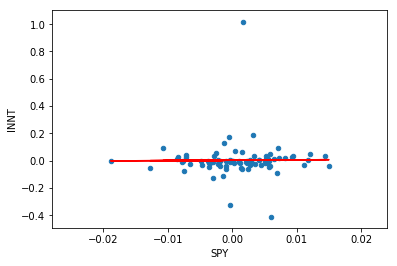

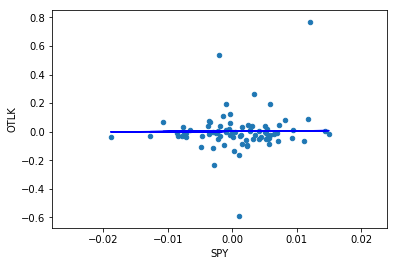

In [3]:
'''6.13 Scatterplots in Python''' ###NOT CORRELATING WELL< TRY daterange: ('2009-01-01','2012-12-31' XOM,GLD)

"""Function called by Test Run."""
def test():
    

    #error if symbol_to_path is uncommented!!! IDK y?
    #Define date range
    start_date='2019-01-18'
    end_date='2019-05-17'
    dates=pd.date_range(start_date, end_date)

    #Create an empty dataframe
    df1 = pd.DataFrame(index=dates)

    #Read SPY Data into temporary dataframe
    dfSPY = pd.read_csv('SPY.csv', index_col='Date',
                        parse_dates= True, usecols=['Date', 'High'],
                        na_values=['nan'])

    #Rename 'High' column to 'SPY' to prevent clash
    dfSPY = dfSPY.rename(columns={'High':'SPY'})

    #Join the two dataframes using DataFrame.join(), with how= 'inner'
    df1=df1.join(dfSPY, how='inner')

    #Read in more stocks

    symbols = ['INNT', 'OTLK']
    for symbol in symbols:
        df_temp=pd.read_csv('{}.csv'.format(symbol), index_col = 'Date', #non_modular version still works kinda
                            parse_dates = True, usecols=['Date','High'],
                            na_values=['nan'])
#         df_temp=pd.read_csv(symbol_to_path(symbol), index_col = 'Date',
#                             parse_dates = True, usecols=['Date','High'],
#                             na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'High': symbol})
        df1=df1.join(df_temp)


#   #Compute Daily returns
    daily_returns = compute_daily_returns(df1)
    
    #Scatterplot SPY vs INNT
    daily_returns.plot(kind='scatter',x='SPY',y='INNT')
    beta_INNT,alpha_INNT=np.polyfit(daily_returns['SPY'],daily_returns['INNT'],1)
    plt.plot(daily_returns['SPY'], beta_INNT*daily_returns['SPY'] + alpha_INNT, '-',color='r')
    
    print("INNT_beta:",beta_INNT)
    print("INNT_alpha:",alpha_INNT)
    #Scatterplot SPY vs OTLK
 
    
    daily_returns.plot(kind='scatter',x='SPY',y='OTLK')
    beta_OTLK,alpha_OTLK=np.polyfit(daily_returns['SPY'],daily_returns['INNT'],1)
    plt.plot(daily_returns['SPY'], beta_INNT*daily_returns['SPY'] + alpha_INNT,'-',color='b')
    print("OTLK_beta:",beta_OTLK)
    print("OTLK_alpha:",alpha_OTLK)
    
    plt.show()
if __name__ == "__main__":
    test()
